# Machine Learning Engineer Nanodegree Capstone Project

# Credit Card Fraud Detection

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score,KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve,confusion_matrix
from sklearn.metrics import  average_precision_score, precision_score, recall_score, make_scorer
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
%matplotlib inline

### Read data from csv dataset

In [2]:
data = pd.read_csv("creditcard.csv")

## Exploratory Data Analysis and Data Visualization 

In [3]:
print('This data  has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

This data  has 284807 rows and 31 columns.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
display(data.head(5))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
display(data.tail(5))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
display(data.describe())

###### Check for missing values

In [7]:
total_null = data.isnull().sum().sort_values(ascending = True)
percent_null = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = True)
display(pd.concat([total_null, percent_null], axis=1, keys=['Total nulls', 'Percent of nulls']).transpose())

,Time,V28,V27,V26,V25,V24,V23,V22,V21,V20,...,V8,V7,V6,V5,V4,V3,V2,V1,V14,Class
Total nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent of nulls,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


No missing values were found on data

###### Check data unbalance

In [8]:
#fraud vs. normal transactions 
total_count = data.Class.count()
counts = data.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%) out off {}.'.format(normal, perc_normal, fraudulent, perc_fraudulent,total_count))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%) out off 284807.


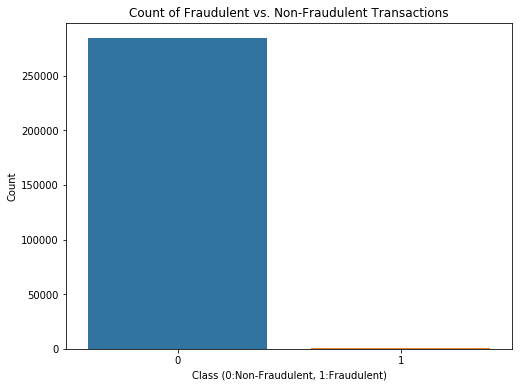

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

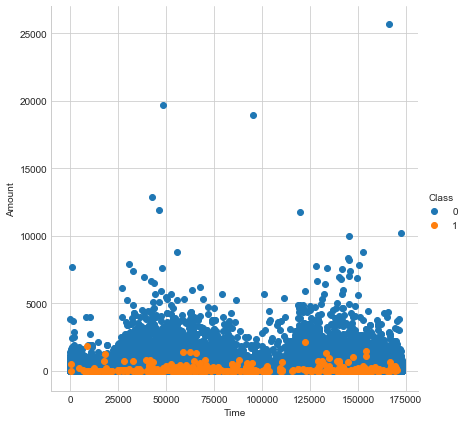

In [10]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

   From the above plot it is clearly visible that ,
   There are frauds only on the transactions which have transaction amount approximately less than 5000.
   The frauds in the transactions are evenly distributed throughout time.
   


###### Correlation Matrix between different features of the dataset

In [11]:
corr = data.corr()
display(corr)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


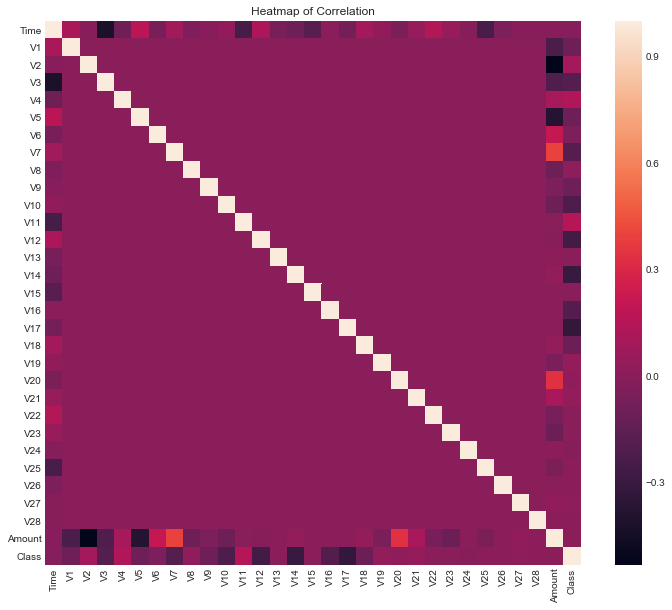

In [12]:
#heatmap
corr = data.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')


According to above Heatmap of Correlation, there is no notable correlation between features V1-V28. 
There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V1 and V5).

In [13]:
#skewness
skew = data.skew()
display(skew)

Time      -0.035568
V1        -3.280667
V2        -4.624866
V3        -2.240155
V4         0.676292
V5        -2.425901
V6         1.826581
V7         2.553907
V8        -8.521944
V9         0.554680
V10        1.187141
V11        0.356506
V12       -2.278401
V13        0.065233
V14       -1.995176
V15       -0.308423
V16       -1.100966
V17       -3.844914
V18       -0.259880
V19        0.109192
V20       -2.037155
V21        3.592991
V22       -0.213258
V23       -5.875140
V24       -0.552499
V25       -0.415793
V26        0.576693
V27       -1.170209
V28       11.192091
Amount    16.977724
Class     23.997579
dtype: float64

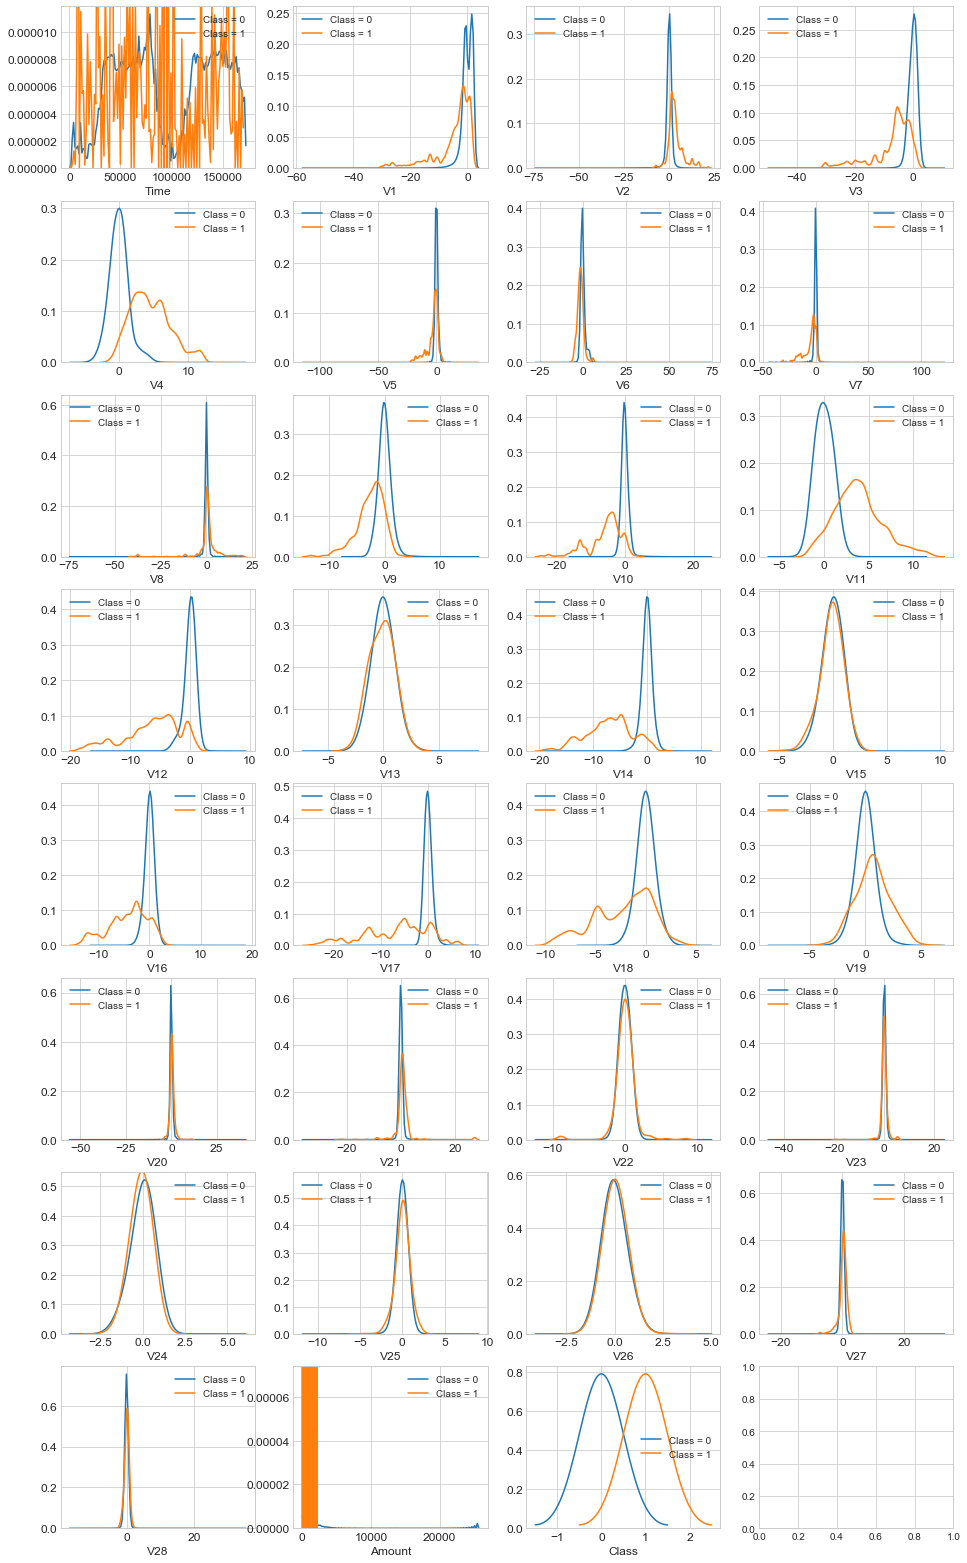

In [14]:
col_val = data.columns.values
index = 0
c0 = data.loc[data['Class'] == 0]
c1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in col_val:
    index += 1
    if(index <= col_val.shape[0]):
        plt.subplot(8,4,index)
        sns.kdeplot(c0[feature], bw=0.5,label="Class = 0")
        sns.kdeplot(c1[feature], bw=0.5,label="Class = 1")
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, Class: V12, V14,V16,V17,V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.

In general, with just few exceptions (Time and Amount), the features distribution for legitimate transactions (values of Class = 0) is centered around 0, sometime with a long queue at one of the extremities. In the same time, the fraudulent transactions (values of Class = 1) have a skewed (asymmetric) distribution.

# Data Preprocessing

###### Normalizing Numerical Features

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data['NormalAmount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['NormalTime'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))
data = data.drop(['Time','Amount'],axis=1)
display(data.head())

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,NormalAmount,NormalTime
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.005824,0.000000
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000105,0.000000
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.014739,0.000006
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.004807,0.000006
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.002724,0.000012


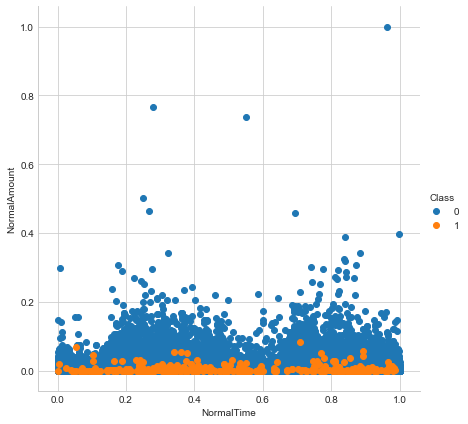

In [16]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="Class", size = 6).map(plt.scatter, "NormalTime", "NormalAmount").add_legend()
plt.show()

In [17]:
X= data.iloc[:,data.columns != "Class"]
y= data.iloc[:,data.columns=="Class"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [18]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

display(X_train.head(2))
display(y_train.head(2))
display(X_train.tail(2))
display(y_train.tail(2))

Training set has 199364 samples.
Testing set has 85443 samples.


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,NormalAmount,NormalTime
239497,2.035263,-0.345493,-1.556181,0.299147,0.142698,-0.474812,-0.010865,-0.023408,1.261428,-0.062959,...,-0.292994,-0.861662,0.263568,0.164858,-0.094151,-0.534790,-0.034946,-0.051772,0.000973,0.868894
14333,-0.361926,1.320257,0.698942,1.878086,0.801906,-0.358268,1.026691,-0.142704,-1.270373,0.617625,...,0.164240,0.377648,-0.013167,0.066324,-0.406715,-0.073288,-0.186322,0.088592,0.000296,0.147067


,Class
239497,0
14333,0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,NormalAmount,NormalTime
267700,2.029296,0.202550,-1.704658,0.532610,0.211710,-1.428396,0.299999,-0.395481,0.528867,-0.496521,...,0.212072,0.792018,-0.027278,-0.065654,0.247837,-0.100722,0.001490,-0.029081,0.000525,0.942671
26863,1.193041,0.133674,0.365635,0.380295,-0.080539,-0.010314,-0.124629,0.101942,-0.192380,0.059224,...,-0.198611,-0.581075,0.111442,-0.314035,0.156572,0.126995,-0.017398,0.002436,0.000155,0.198418


,Class
267700,0
26863,0


In [19]:
display(X_test.head(2))
display(y_test.head(2))
display(X_test.tail(2))
display(y_test.tail(2))

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,NormalAmount,NormalTime
184721,0.687164,-2.252911,-1.260114,1.799563,-0.836091,0.234913,0.422944,-0.159731,0.807088,-0.125072,...,0.749478,0.873771,-0.543447,0.735454,-0.086049,-0.475839,-0.072331,0.085696,0.026079,0.731278
105662,1.153255,0.499454,-0.265630,1.154868,0.187468,-0.424207,0.050576,0.096463,-0.198235,-0.412593,...,0.016040,0.068422,-0.090875,-0.117166,0.556101,-0.311909,0.038231,0.035558,0.000039,0.402999


,Class
184721,0
105662,0


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,NormalAmount,NormalTime
208518,-0.015678,0.208809,0.599080,1.200235,1.041592,-0.133283,0.499505,-0.341531,-0.076815,0.085927,...,0.216280,1.044077,-0.141962,0.770931,-0.359832,0.161625,0.075900,-0.001239,0.000944,0.793746
261208,-0.227781,1.540808,0.747453,3.667628,2.128162,2.825476,0.937299,0.081618,-1.308415,2.984936,...,-0.344643,-0.130687,0.028284,-1.022612,-1.072963,0.045102,0.230316,-0.285761,0.000246,0.925471


,Class
208518,0
261208,0


###### Over Sampling using SMOTE

In [20]:
smote = SMOTE(ratio='auto',kind='regular')
smote_X,smote_y = smote.fit_sample(X_train,y_train.values.ravel())
smote_data_X = pd.DataFrame(data=smote_X,columns=X_train.columns )
smote_data_Y= pd.DataFrame(data=smote_y,columns=["Class"])
smote_data = smote_data_X
smote_data["Class"] = smote_data_Y["Class"]

In [21]:
#fraud vs. normal transactions in SMOTE
smote_total_count = smote_data.Class.count()
smote_counts = smote_data.Class.value_counts()
smote_normal = smote_counts[0]
smote_fraudulent = smote_counts[1]
smote_perc_normal = (smote_normal/(smote_normal+smote_fraudulent))*100
smote_perc_fraudulent = (smote_fraudulent/(smote_normal+smote_fraudulent))*100
print('After SMOTE {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%) out off {}.'.format(smote_normal, smote_perc_normal, smote_fraudulent, smote_perc_fraudulent,smote_total_count))

After SMOTE 198993 non-fraudulent transactions (50.000%) and 198993 fraudulent transactions (50.000%) out off 397986.


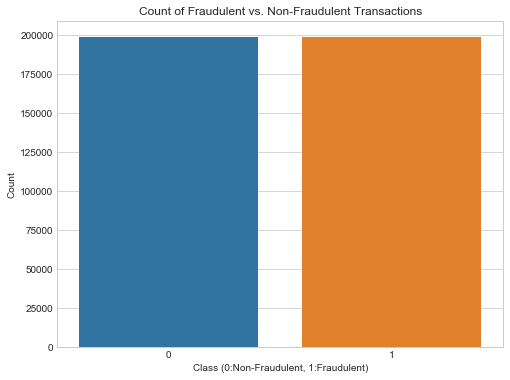

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x=smote_counts.index, y=smote_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [23]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: class training set
       - X_test: features testing set
       - y_test: class testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
     # Calculate the predict time
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end-start
    
    # Compute precision on the training samples 
    results['auprc_train'] = average_precision_score(y_train,predictions_train)
    
    # Compute cross validation on the training set 
    auprc_scorer = make_scorer(average_precision_score)  
       
    results['auprc_cv'] = cross_val_score(learner, X_train, y_train,cv=4, scoring = auprc_scorer).mean()
        
    # Compute cross validation on the training set 
    recall_scorer = make_scorer(recall_score)
    results['recall_cv'] = cross_val_score(learner, X_train, y_train,cv=4, scoring = recall_scorer).mean()

    # Compute recall on the training samples 
    results['recall_train'] = recall_score(y_train,predictions_train)
    
    results['prc_precision'], results['prc_recall'], results['prc_thresholds'] = precision_recall_curve(y_train,predictions_train)
        
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [24]:
smote_X_train,smote_X_test,smote_y_train,smote_y_test = train_test_split(smote_X,smote_y,test_size=0.2)

In [26]:
# Initialize the four models
clf_A = LogisticRegression(solver='liblinear')
clf_B = DecisionTreeClassifier(random_state=42) 
clf_C = GaussianNB()
clf_D = MLPClassifier(max_iter=500,hidden_layer_sizes=(50),random_state=0)
clf_E = XGBClassifier(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, \
                max_depth = 5, alpha = 10, n_estimators = 10)

clf_F = LGBMClassifier(boosting_type='gbdt', num_leaves=31, max_depth=-1, learning_rate=0.1, n_estimators=400)
# Calculate the number of samples for 1%, 10%, 50% and 100% of the training data
# samples_100 is the entire training set i.e. len(y_train)
# samples_10 is 10% of samples_100
# samples_1 is 1% of samples_100

samples_100 = len(smote_y_train)
samples_50 = int(samples_100*0.5)
samples_10 = int(samples_100*0.1)
samples_1 = int(samples_100*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D,clf_E,clf_F]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_50, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, smote_X_train, smote_y_train, smote_X_test, smote_y_test)
    

LogisticRegression trained on 3183 samples.
LogisticRegression trained on 31838 samples.
LogisticRegression trained on 159194 samples.
LogisticRegression trained on 318388 samples.
DecisionTreeClassifier trained on 3183 samples.
DecisionTreeClassifier trained on 31838 samples.
DecisionTreeClassifier trained on 159194 samples.
DecisionTreeClassifier trained on 318388 samples.
GaussianNB trained on 3183 samples.
GaussianNB trained on 31838 samples.
GaussianNB trained on 159194 samples.
GaussianNB trained on 318388 samples.
MLPClassifier trained on 3183 samples.
MLPClassifier trained on 31838 samples.
MLPClassifier trained on 159194 samples.
MLPClassifier trained on 318388 samples.
XGBClassifier trained on 3183 samples.
XGBClassifier trained on 31838 samples.
XGBClassifier trained on 159194 samples.
XGBClassifier trained on 318388 samples.
LGBMClassifier trained on 3183 samples.
LGBMClassifier trained on 31838 samples.
LGBMClassifier trained on 159194 samples.
LGBMClassifier trained on 31

In [27]:
for clf in [clf_A, clf_B, clf_C, clf_D,clf_E,clf_F]:
    clf_name = clf.__class__.__name__
    print(clf_name)
    display(pd.DataFrame(results[clf_name])) 
    print("--------")

LogisticRegression


,0,1,2,3
auprc_cv,0.939329,0.939329,0.939329,0.939329
auprc_train,0.937349,0.940824,0.939944,0.939319
prc_precision,"[0.500709825747, 0.972974757076, 1.0]","[0.500709825747, 0.974208266767, 1.0]","[0.500709825747, 0.975487958939, 1.0]","[0.500709825747, 0.975430951703, 1.0]"
prc_recall,"[1.0, 0.924564044662, 0.0]","[1.0, 0.929494417263, 0.0]","[1.0, 0.925134863882, 0.0]","[1.0, 0.923930498055, 0.0]"
prc_thresholds,"[0, 1]","[0, 1]","[0, 1]","[0, 1]"
pred_time,0.0312417,0.0312445,0.0378985,0.0284369
recall_cv,0.923924,0.923924,0.923924,0.923924
recall_train,0.924564,0.929494,0.925135,0.92393
train_time,0.0312428,0.83265,2.68038,5.43534


--------
DecisionTreeClassifier


,0,1,2,3
auprc_cv,0.995898,0.995898,0.995898,0.995898
auprc_train,0.935892,0.982461,0.997083,1
prc_precision,"[0.500709825747, 0.951861297151, 1.0]","[0.500709825747, 0.985851112855, 1.0]","[0.500709825747, 0.997631905376, 1.0]","[1.0, 1.0]"
prc_recall,"[1.0, 0.964602935642, 0.0]","[1.0, 0.993012169113, 0.0]","[1.0, 0.998895997993, 0.0]","[1.0, 0.0]"
prc_thresholds,"[0, 1]","[0, 1]","[0, 1]",[1]
pred_time,0.078104,0.10935,0.116691,0.124971
recall_cv,0.99852,0.99852,0.99852,0.99852
recall_train,0.964603,0.993012,0.998896,1
train_time,0.109315,1.51155,15.6522,38.9904


--------
GaussianNB


,0,1,2,3
auprc_cv,0.906445,0.906445,0.906445,0.906445
auprc_train,0.906221,0.906004,0.906708,0.906418
prc_precision,"[0.500709825747, 0.972093649657, 1.0]","[0.500709825747, 0.971793363895, 1.0]","[0.500709825747, 0.972828940833, 1.0]","[0.500709825747, 0.972477780063, 1.0]"
prc_recall,"[1.0, 0.860255927738, 0.0]","[1.0, 0.86034374608, 0.0]","[1.0, 0.859948563543, 0.0]","[1.0, 0.859973654498, 0.0]"
prc_thresholds,"[0, 1]","[0, 1]","[0, 1]","[0, 1]"
pred_time,0.527862,0.562022,0.528015,0.561019
recall_cv,0.859967,0.859967,0.859967,0.859967
recall_train,0.860256,0.860344,0.859949,0.859974
train_time,0,0.0312426,0.156181,0.396024


--------
MLPClassifier


,0,1,2,3
auprc_cv,0.999226,0.999226,0.999226,0.999226
auprc_train,0.983546,0.996998,0.999398,0.999856
prc_precision,"[0.500709825747, 0.986155769362, 1.0]","[0.996998123827, 1.0]","[0.999398179493, 1.0]","[0.999855747822, 1.0]"
prc_recall,"[1.0, 0.994624262953, 0.0]","[1.0, 0.0]","[1.0, 0.0]","[1.0, 0.0]"
prc_thresholds,"[0, 1]",[1],[1],[1]
pred_time,0.328006,0.328043,0.389957,0.390532
recall_cv,0.999893,0.999893,0.999893,0.999893
recall_train,0.994624,1,1,1
train_time,2.84151,12.8747,30.705,50.6413


--------
XGBClassifier


,0,1,2,3
auprc_cv,0.957375,0.957375,0.957375,0.957375
auprc_train,0.948015,0.958342,0.958972,0.957868
prc_precision,"[0.500709825747, 0.989454624368, 1.0]","[0.500709825747, 0.993754197448, 1.0]","[0.500709825747, 0.99551617884, 1.0]","[0.500709825747, 0.995338877142, 1.0]"
prc_recall,"[1.0, 0.915211391293, 0.0]","[1.0, 0.92817714214, 0.0]","[1.0, 0.926144774809, 0.0]","[1.0, 0.924244134989, 0.0]"
prc_thresholds,"[0, 1]","[0, 1]","[0, 1]","[0, 1]"
pred_time,0.670542,0.5902,0.577989,0.593615
recall_cv,0.923818,0.923818,0.923818,0.923818
recall_train,0.915211,0.928177,0.926145,0.924244
train_time,0.0937252,0.847573,5.35756,11.0958


--------
LGBMClassifier


,0,1,2,3
auprc_cv,0.999571,0.999571,0.999571,0.999571
auprc_train,0.986292,0.998328,0.999693,0.997986
prc_precision,"[0.500709825747, 0.993027794093, 1.0]","[0.500709825747, 0.998371600716, 1.0]","[0.500709825747, 0.999711526402, 1.0]","[0.500709825747, 0.998501511029, 1.0]"
prc_recall,"[1.0, 0.986319156944, 0.0]","[1.0, 0.999912181659, 0.0]","[1.0, 0.999962363568, 0.0]","[1.0, 0.998964998118, 0.0]"
prc_thresholds,"[0, 1]","[0, 1]","[0, 1]","[0, 1]"
pred_time,12.2865,16.6744,18.9396,19.6234
recall_cv,0.999969,0.999969,0.999969,0.999969
recall_train,0.986319,0.999912,0.999962,0.998965
train_time,1.54739,6.7969,23.0153,38.7606


--------


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


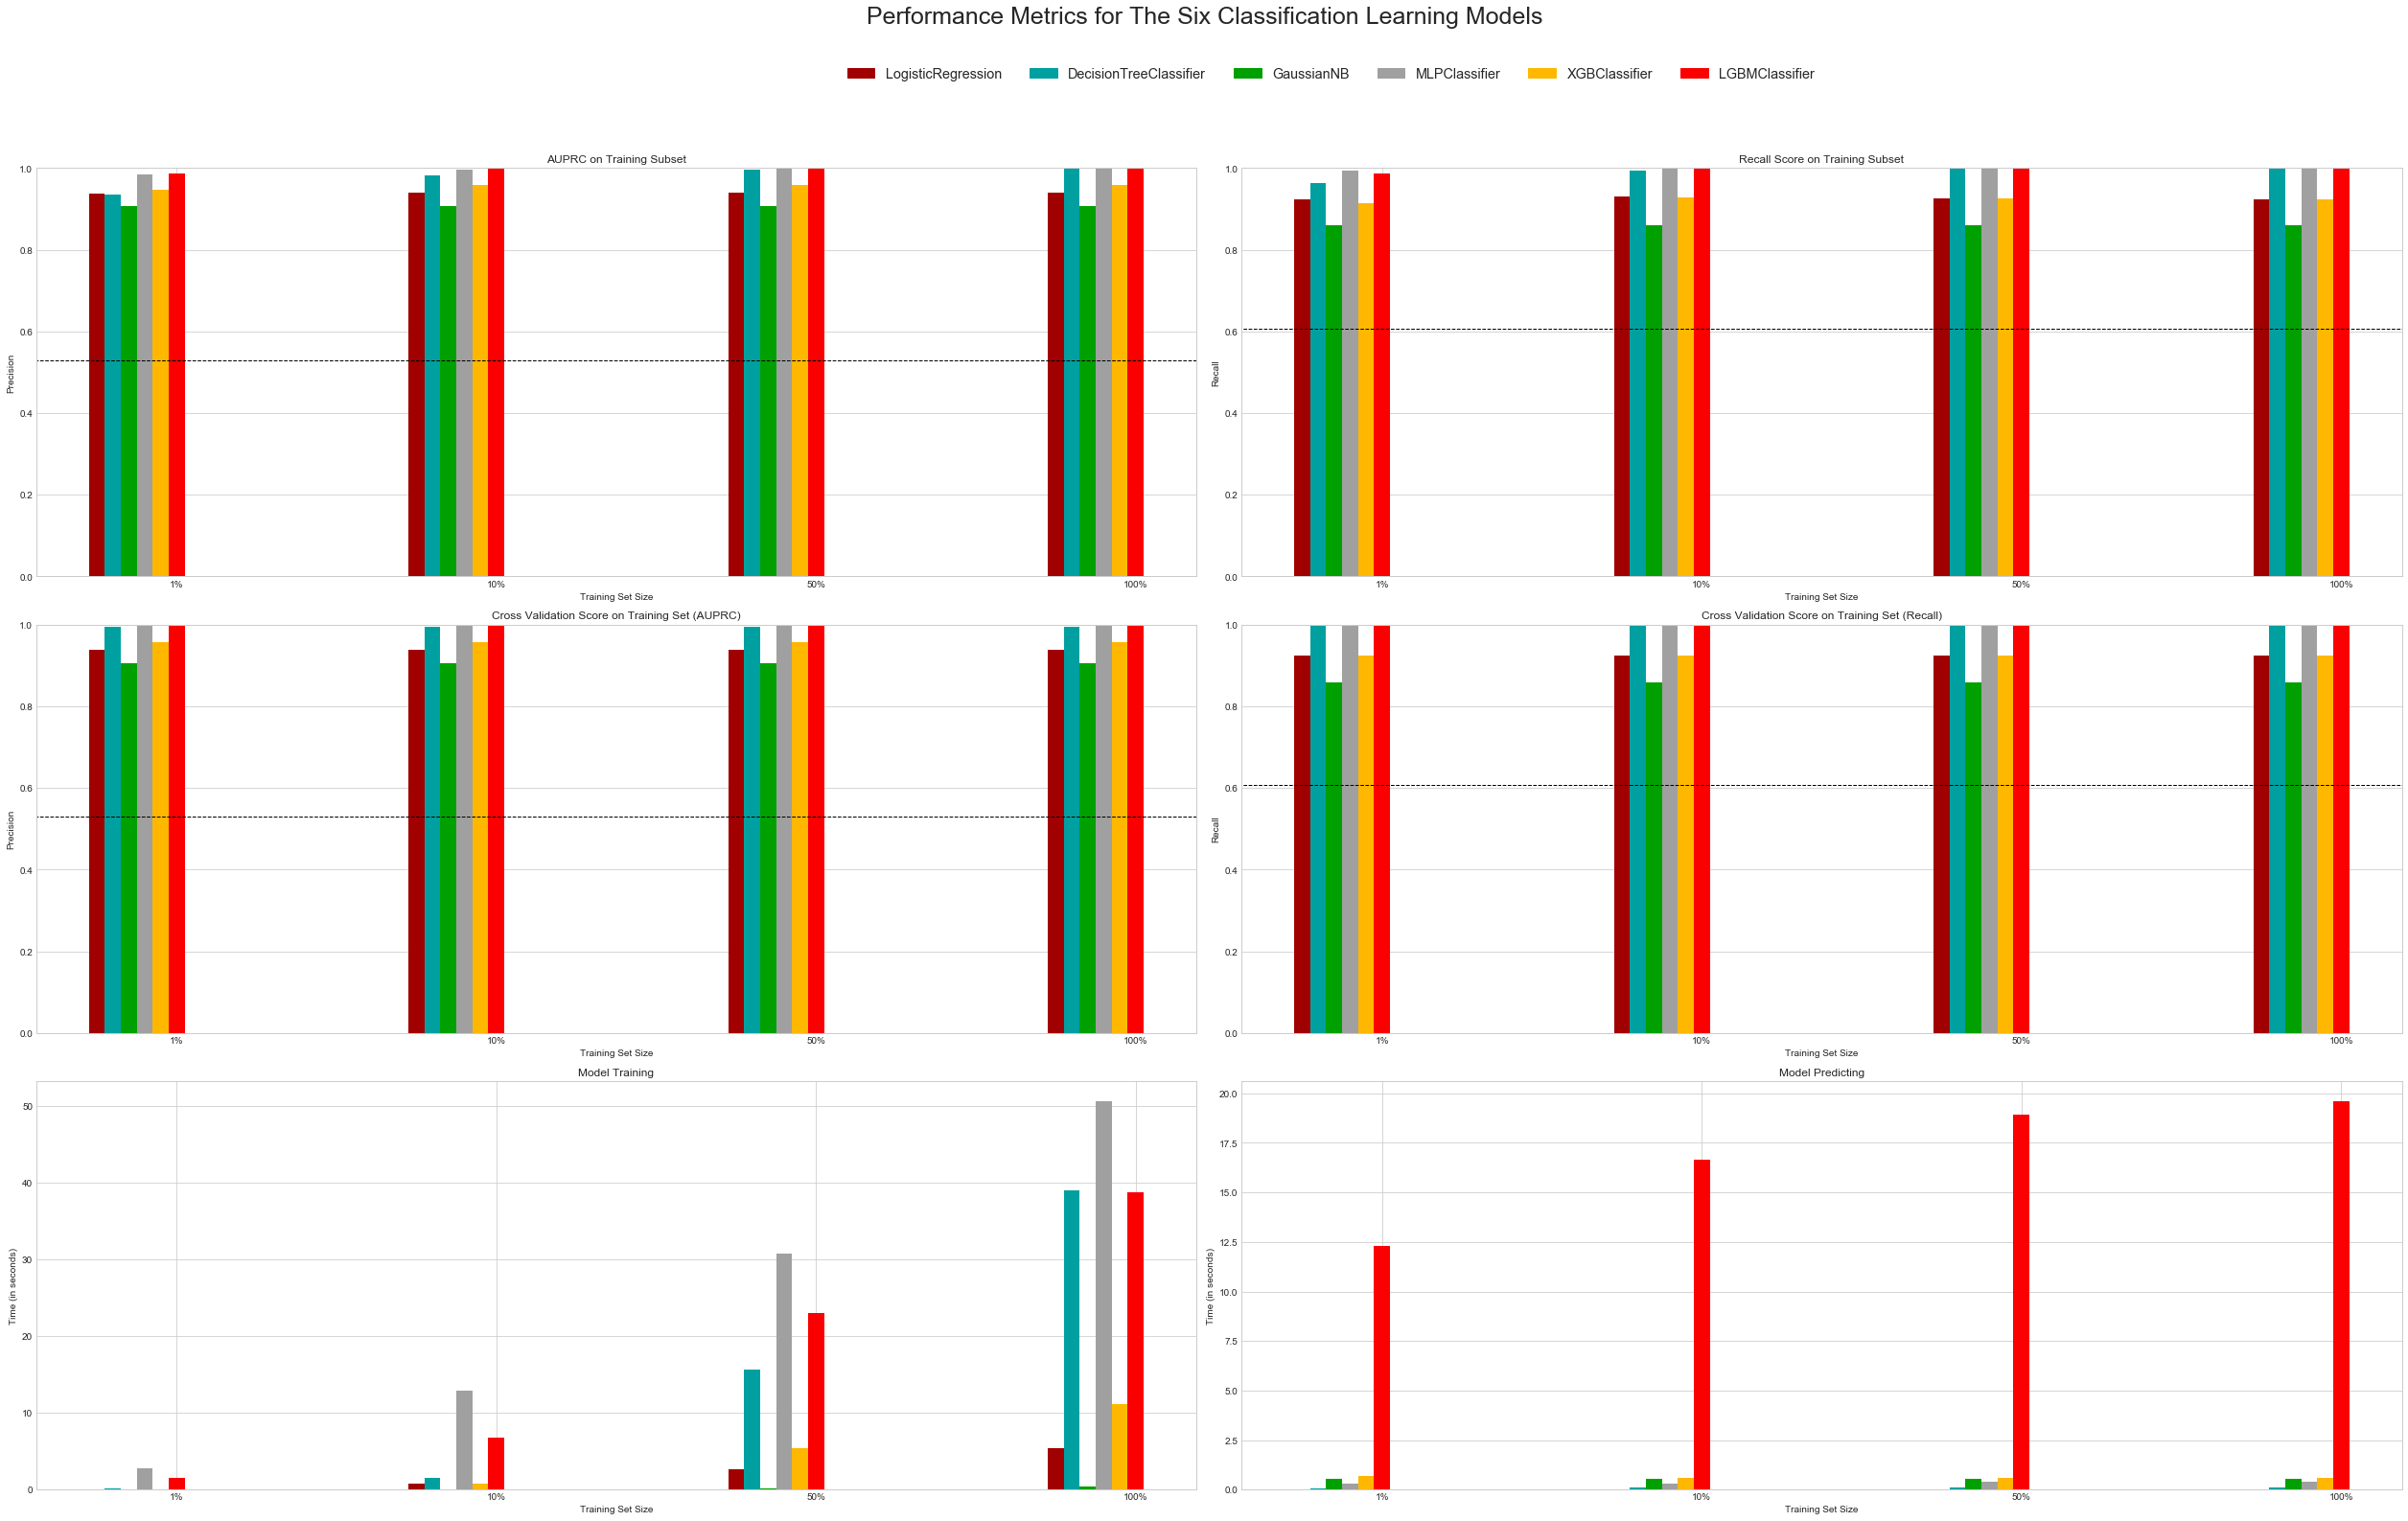

In [28]:
precision_benchmark = 0.8710
recall_benchmark = 0.6067
auprc_benchmark = 0.5291
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import Results_Visualizer as rv
#rv.show_results(results, auprc_benchmark, recall_benchmark)
rv.show_resultsVs(results, auprc_benchmark, recall_benchmark)
#rv.show_rVs(results, auprc_benchmark, recall_benchmark)

In [29]:
def  draw_precision_recall_curve (recall ,precision,clf_name):
    plt.step(recall[0], precision[0], color='orange', alpha=0.5,linewidth=1.5,label='samples_1')
    plt.step(recall[1], precision[1], color='blue', alpha=0.5,linewidth=1.5,label='samples_10')
    plt.step(recall[2], precision[2], color='green', alpha=0.5,linewidth=1.5,label='samples_50')
    plt.step(recall[3], precision[3], color='red', alpha=0.5,linewidth=1.5,label='samples_100')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve For {}'.format(clf_name))
    plt.legend(loc='best', bbox_to_anchor=(1,1), fontsize = 'large')

0    [0.500709825747, 0.972974757076, 1.0]
1    [0.500709825747, 0.974208266767, 1.0]
2    [0.500709825747, 0.975487958939, 1.0]
3    [0.500709825747, 0.975430951703, 1.0]
Name: prc_precision, dtype: object
0    [1.0, 0.924564044662, 0.0]
1    [1.0, 0.929494417263, 0.0]
2    [1.0, 0.925134863882, 0.0]
3    [1.0, 0.923930498055, 0.0]
Name: prc_recall, dtype: object


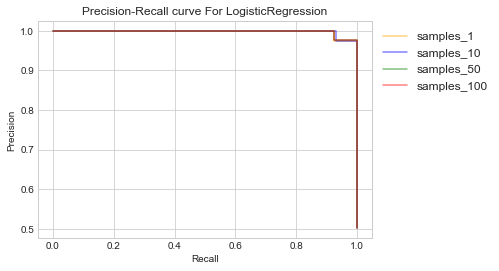

In [30]:
clf_name='LogisticRegression'
recall =(pd.DataFrame(results[clf_name])).iloc[3]
precision =(pd.DataFrame(results[clf_name])).iloc[2]
print(precision)
print(recall)
draw_precision_recall_curve (recall,precision,clf_name)

0    [0.500709825747, 0.951861297151, 1.0]
1    [0.500709825747, 0.985851112855, 1.0]
2    [0.500709825747, 0.997631905376, 1.0]
3                               [1.0, 1.0]
Name: prc_precision, dtype: object
0    [1.0, 0.964602935642, 0.0]
1    [1.0, 0.993012169113, 0.0]
2    [1.0, 0.998895997993, 0.0]
3                    [1.0, 0.0]
Name: prc_recall, dtype: object


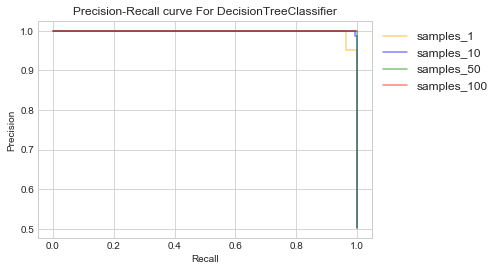

In [31]:
clf_name='DecisionTreeClassifier'
recall =(pd.DataFrame(results[clf_name])).iloc[3]
precision =(pd.DataFrame(results[clf_name])).iloc[2]
print(precision)
print(recall)
draw_precision_recall_curve (recall,precision,clf_name)

0    [0.500709825747, 0.972093649657, 1.0]
1    [0.500709825747, 0.971793363895, 1.0]
2    [0.500709825747, 0.972828940833, 1.0]
3    [0.500709825747, 0.972477780063, 1.0]
Name: prc_precision, dtype: object
0    [1.0, 0.860255927738, 0.0]
1     [1.0, 0.86034374608, 0.0]
2    [1.0, 0.859948563543, 0.0]
3    [1.0, 0.859973654498, 0.0]
Name: prc_recall, dtype: object


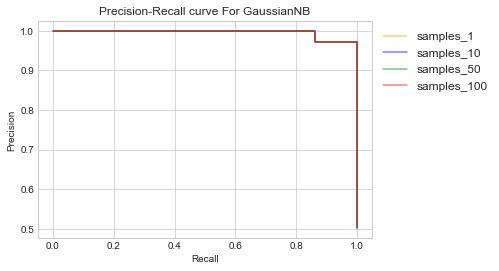

In [32]:
clf_name='GaussianNB'
recall =(pd.DataFrame(results[clf_name])).iloc[3]
precision =(pd.DataFrame(results[clf_name])).iloc[2]
print(precision)
print(recall)
draw_precision_recall_curve (recall,precision,clf_name)

0    [0.500709825747, 0.986155769362, 1.0]
1                    [0.996998123827, 1.0]
2                    [0.999398179493, 1.0]
3                    [0.999855747822, 1.0]
Name: prc_precision, dtype: object
0    [1.0, 0.994624262953, 0.0]
1                    [1.0, 0.0]
2                    [1.0, 0.0]
3                    [1.0, 0.0]
Name: prc_recall, dtype: object


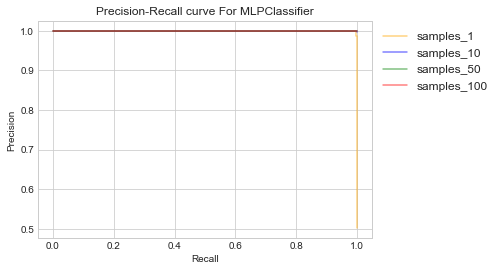

In [33]:
clf_name='MLPClassifier'
recall =(pd.DataFrame(results[clf_name])).iloc[3]
precision =(pd.DataFrame(results[clf_name])).iloc[2]
print(precision)
print(recall)
draw_precision_recall_curve (recall,precision,clf_name)

0    [0.500709825747, 0.989454624368, 1.0]
1    [0.500709825747, 0.993754197448, 1.0]
2     [0.500709825747, 0.99551617884, 1.0]
3    [0.500709825747, 0.995338877142, 1.0]
Name: prc_precision, dtype: object
0    [1.0, 0.915211391293, 0.0]
1     [1.0, 0.92817714214, 0.0]
2    [1.0, 0.926144774809, 0.0]
3    [1.0, 0.924244134989, 0.0]
Name: prc_recall, dtype: object


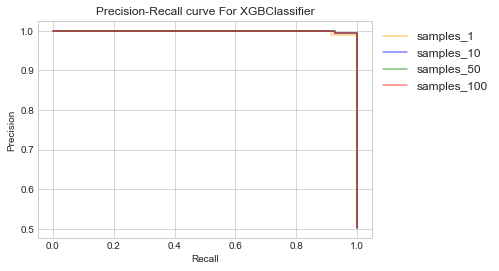

In [34]:
clf_name='XGBClassifier'
recall =(pd.DataFrame(results[clf_name])).iloc[3]
precision =(pd.DataFrame(results[clf_name])).iloc[2]
print(precision)
print(recall)
draw_precision_recall_curve (recall,precision,clf_name)

0    [0.500709825747, 0.993027794093, 1.0]
1    [0.500709825747, 0.998371600716, 1.0]
2    [0.500709825747, 0.999711526402, 1.0]
3    [0.500709825747, 0.998501511029, 1.0]
Name: prc_precision, dtype: object
0    [1.0, 0.986319156944, 0.0]
1    [1.0, 0.999912181659, 0.0]
2    [1.0, 0.999962363568, 0.0]
3    [1.0, 0.998964998118, 0.0]
Name: prc_recall, dtype: object


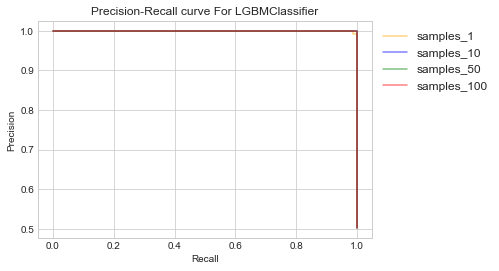

In [35]:
clf_name='LGBMClassifier'
recall =(pd.DataFrame(results[clf_name])).iloc[3]
precision =(pd.DataFrame(results[clf_name])).iloc[2]
print(precision)
print(recall)
draw_precision_recall_curve (recall,precision,clf_name)

In [36]:
clf_lgbm= LGBMClassifier(boosting_type='gbdt', max_depth=-1, learning_rate=0.1, n_estimators=400)
parameters ={
    'num_leaves': [31, 50],
    'min_data_in_leaf': [ 50, 100],
    'lambda_l1': [0, 1],
    'lambda_l2': [0, 1]
    }
auprc_scorer = make_scorer(average_precision_score)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator=clf_lgbm,param_grid=parameters,scoring=auprc_scorer)

#smote_X_train,smote_X_test,smote_y_train,smote_y_test

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(smote_X_train,smote_y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# get cv scores using the unoptimized and optimized model
predictions_cv = cross_val_score(clf_lgbm,smote_X_train,smote_y_train,cv=4, scoring = auprc_scorer).mean()
best_predictions_cv = cross_val_score(best_clf,smote_X_train,smote_y_train,cv=4, scoring = auprc_scorer).mean()



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [37]:
# Report the before-and-afterscores
print ("Non-optimized model\n------")
print( "Cross Validation Score on training data (AUPRC): {:.4f}".format(predictions_cv))
print ("\nOptimized Model\n------")
print ("Final Cross Validation Score on training data (AUPRC): {:.4f}".format(best_predictions_cv))

Non-optimized model
------
Cross Validation Score on training data (AUPRC): 0.9996

Optimized Model
------
Final Cross Validation Score on training data (AUPRC): 0.9997


In [38]:
y_pred = best_clf.predict(smote_X_test)
y_true = smote_y_test

precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
average_precision = average_precision_score(y_true, y_pred)
print('Average precision-recall score: {0:0.4f}'.format(
      average_precision))
print('Precision score: {0:0.4f}'.format(
      precision))
print('Recall score: {0:0.4f}'.format(
      recall))

Average precision-recall score: 0.9998
Precision score: 0.9998
Recall score: 1.0000


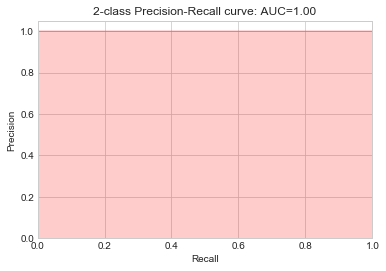

In [39]:
precision, recall,thresholds = precision_recall_curve(y_true, y_pred)

plt.step(recall, precision, color='red', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='red')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))
plt.show()

In [40]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass
    
    thresh = cm.max() / 2.
   
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
               plt.text(j, i, cm[i, j],horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the test dataset:  1.0


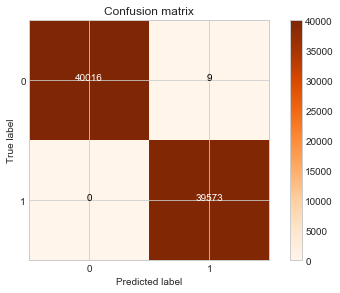

In [41]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the test dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]

plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()